In [19]:
library(dplyr)
library(patchwork)
library(ggplot2)

In [43]:
test.dir <- "~/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5"
deg.files <- list.files(file.path(test.dir,"MAST/high_vs_low"),
                       full.names = TRUE, pattern = "csv")
# deg.files <- list.files("~/rat_snrnaseq_pipeline/dge_labeled/out/dge-with-batch-and-percent-mt-covars/MAST/high_vs_low",
#                        full.names = TRUE, pattern = "csv")
deg.files

[1] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Astrocytes_high_vs_low.csv"      
 [2] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Cck+-Vip+_high_vs_low.csv"       
 [3] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Chat+_high_vs_low.csv"           
 [4] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Endothelial_high_vs_low.csv"     
 [5] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/ExNeuron_high_vs_low.csv"        
 [6] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/InhNeuron_high_vs_low.csv"       
 [7] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Microglia_high_vs_low.csv"       
 [8] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Nos1+_high_vs_low.csv"           
 [9] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Oligodendrocytes_high_vs_low.csv"
[10] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/OPC_high_vs_low.csv"             
[11] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Pvalb+_high_vs_low.csv"          
[12] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Reln+_high_vs_low.csv"           
[13] "/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes5/MAST/high_vs_low/Sst+_high_vs_low.csv"

In [44]:
df <- read.csv(deg.files[1], row.names = 1)
head(df)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Pld5,1.479222e-53,0.40019973,0.212,0.129,2.558611e-49,Astrocytes
Penk,9.667584e-45,0.18448087,0.366,0.336,1.672202e-40,Astrocytes
Kcnma1,1.498076e-42,0.19531090,0.471,0.447,2.591222e-38,Astrocytes
Fam107a,2.537752e-25,0.15806880,0.333,0.302,4.389549e-21,Astrocytes
Ppp1r1b,1.196369e-21,0.12302447,0.179,0.165,2.069359e-17,Astrocytes
Hdac4,5.985237e-21,0.07378394,0.305,0.304,1.035266e-16,Astrocytes


In [45]:
for (file in deg.files) {
    ct <- strsplit(basename(file), "_")[[1]][1]
    df <- read.csv(file, row.names = 1)
    df$q_val <- p.adjust(df$p_val, method = "fdr")
    significant <- df %>% filter(q_val<0.1)
    cat(sprintf('%s - %d significant genes (FDR<10%%)\n', ct, dim(significant)[1]))
    pdf(file.path(test.dir, sprintf('MAST/high_vs_low/%s_pval_hist.pdf', ct)),
       width = 10, height = 8)
    print(hist(df$p_val), main = sprintf("p-val distribution for DEGs in %s", ct))
    dev.off()
}

Astrocytes - 968 significant genes (FDR<10%)
$breaks
 [1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

$counts
 [1] 2722 1183  962  847  743  792  667  749  685  661  624  692  678  573  581
[16]  679  669  659  583 1548

$density
 [1] 3.1473666 1.3678673 1.1123316 0.9793606 0.8591085 0.9157657 0.7712320
 [8] 0.8660461 0.7920449 0.7642944 0.7215124 0.8001388 0.7839510 0.6625426
[15] 0.6717928 0.7851072 0.7735445 0.7619818 0.6741053 1.7899058

$mids
 [1] 0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
[13] 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975

$xname
[1] "df$p_val"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"
Cck+-Vip+ - 1467 significant genes (FDR<10%)
$breaks
 [1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

$counts
 [1] 3328 1376 1111  898  856  797  757  653  608  629  633  592  573  549  551
[16]  557  502  465

$breaks
 [1] 0.00 0.05 0.10 0.15 0.20 0.25 0.30 0.35 0.40 0.45 0.50 0.55 0.60 0.65 0.70
[16] 0.75 0.80 0.85 0.90 0.95 1.00

$counts
 [1] 2226 1159 1022  915  882  801  784  789  736  715  698  720  690  643  633
[16]  628  674  561  604 1417

$density
 [1] 2.5738567 1.3401168 1.1817078 1.0579869 1.0198300 0.9261722 0.9065156
 [8] 0.9122969 0.8510146 0.8267330 0.8070764 0.8325143 0.7978262 0.7434815
[15] 0.7319188 0.7261375 0.7793259 0.6486674 0.6983870 1.6384344

$mids
 [1] 0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
[13] 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975

$xname
[1] "df$p_val"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [14]:
oligo <- read.csv('/iblm/netapp/home/jezhou/rat_snrnaseq_pipeline/dge_labeled/out/relabeled_subtypes3/high_vs_low/Oligodendrocytes_high_vs_low.csv',
                 row.names = 1)
head(oligo)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,celltype
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Zbtb16,1.401192e-71,0.6336539,0.249,0.132,2.423642e-67,Oligodendrocytes
Phactr3,4.551297e-51,0.3989290,0.244,0.173,7.872378e-47,Oligodendrocytes
Cdc37l1,2.402575e-48,0.4299689,0.463,0.365,4.155733e-44,Oligodendrocytes
Sgk1,4.458752e-43,0.4380058,0.329,0.252,7.712304e-39,Oligodendrocytes
Vbp1,1.142407e-40,-0.2778259,0.271,0.346,1.976021e-36,Oligodendrocytes
AABR07053870.1,2.392606e-32,-0.6160701,0.117,0.210,4.138490e-28,Oligodendrocytes


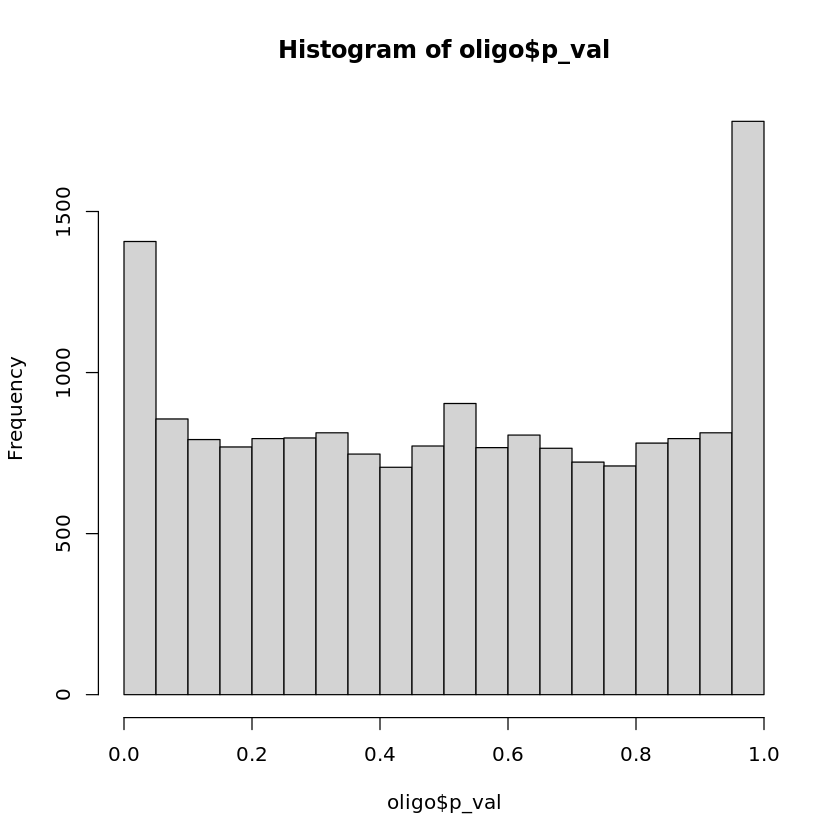

In [15]:
hist(oligo$p_val)

In [16]:
oligo.perm <- read.csv("../deseq2/mast_perm_test_plots/Oligodendrocytes_permuted_degs.csv", row.names = 1)
head(oligo.perm)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nars2,1.754518e-05,-0.06255941,0.018,0.028,0.303479
Abca17,1.416166e-04,0.03099161,0.016,0.010,1.000000
Zmat4,3.125760e-04,-0.02184789,0.007,0.008,1.000000
Psma3,3.309662e-04,-0.01507817,0.097,0.092,1.000000
Prkab2,3.572894e-04,0.04181681,0.012,0.007,1.000000
Rpl14,3.839077e-04,-0.05005886,0.326,0.351,1.000000


In [17]:
gg_qqplot <- function(ps.obs, ps.perm, ci = 0.95) {
    n  <-  max(length(ps.obs), length(ps.perm))
    
    observed <- -log10(sort(ps.obs))
    permuted <- -log10(sort(ps.perm))
    expected <- -log10(ppoints(n))
    
    observed.points = c(observed, rep(NA, n - length(observed)))
    permuted.points = c(permuted, rep(NA, n - length(permuted)))
    
    df <- data.frame(observed = observed.points,
                permuted = permuted.points,
                expected = expected,
                clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1)),
                cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1)))
    
    plotdf <- tidyr::pivot_longer(df, cols = c("observed", "permuted"), 
      names_to = "data", values_to = "-log10(p)")

    log10Pe <- expression(paste("Expected -log"[10], plain(P)))
    log10Po <- expression(paste("-log"[10], plain(P)))

    ggplot(plotdf) +
        geom_ribbon(
          mapping = aes(x = expected, ymin = clower, ymax = cupper),
          alpha = 0.1
        ) +
        geom_point(aes(x = expected, y = `-log10(p)`, color = data), size = 3) +
        geom_abline(intercept = 0, slope = 1, alpha = 0.5) +
        geom_line(aes(expected, cupper), linetype = 2, size = 0.5) +
        geom_line(aes(expected, clower), linetype = 2, size = 0.5) +
        xlab(log10Pe) + 
        ylab(log10Po) +   theme_bw(base_size = 24) +
      theme(
        axis.ticks = element_line(size = 0.5),
        panel.grid = element_blank(),
          legend.title = element_blank()
      )

}

In [20]:
p.out <- gg_qqplot(oligo$p_val, oligo.perm$p_val)

Warning message:
“Removed 2649 rows containing missing values (geom_point).”


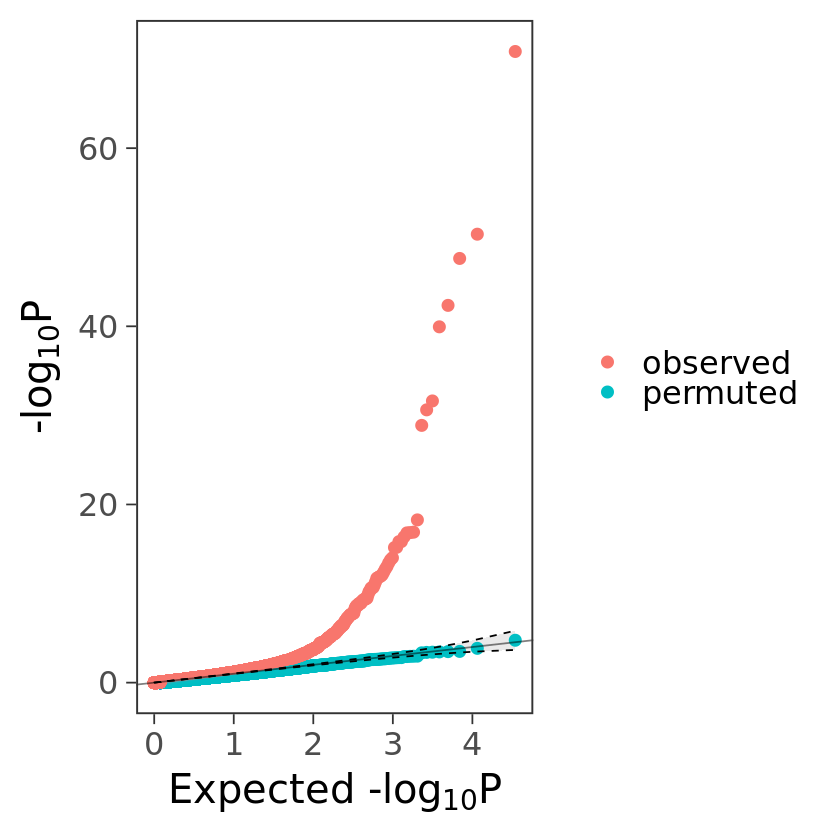

In [21]:
p.out

# Test FindMarkers

In [11]:
rds <- readRDS("~/rat_snrnaseq_pipeline/rpca/out/subset/integrated_relabeled_inhneuron_subtypes_with_batch.rds")
rds

Loading required package: Seurat

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



An object of class Seurat 
36594 features across 163003 samples within 3 assays 
Active assay: RNA (17297 features, 0 variable features)
 2 other assays present: SCT, integrated
 2 dimensional reductions calculated: pca, umap

In [23]:
table(rds$label)


cocaine_high  cocaine_low        naive 
       54122        50527        58354 

In [14]:
degs.percentmt <- FindMarkers(rds,
                    test.use = "MAST", ident.1 = "cocaine_high", ident.2 = "cocaine_low",
                    latent.vars = "percent.mt", group.by = "label", subset.ident = "Astrocytes",
                    logfc.threshold = 0, min.pct = 0, assay = "RNA")



 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------


 Completed [===============================>------------]  74% with 0 failures

 Completed [================================>-----------]  74% with 0 failures

 Completed [================================>-----------]  75% with 0 failures

 Completed [================================>-----------]  76% with 0 failures

 Completed [=================================>----------]  76% with 0 failures

 Completed [=================================>----------]  77% with 0 failures

 Completed [=================================>----------]  78% with 0 failures

 Completed [==================================>---------]  78% with 0 failures

 Completed [==================================>---------]  79% with 0 failures

 Completed [==================================>---------]  80% with 0 failures

 Completed [==================================>---------]  81% with 0 failures

 Completed [===================================>--------]  81% with 0 failures

 Completed [===========================


 Completed [==================>-------------------------]  44% with 0 failures

 Completed [===================>------------------------]  44% with 0 failures

 Completed [===================>------------------------]  45% with 0 failures

 Completed [===================>------------------------]  46% with 0 failures

 Completed [===================>------------------------]  47% with 0 failures

 Completed [====================>-----------------------]  47% with 0 failures

 Completed [====================>-----------------------]  48% with 0 failures

 Completed [====================>-----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  50% with 0 failures

 Completed [=====================>----------------------]  51% with 0 failures

 Completed [======================>---------------------]  51% with 0 failures

 Completed [======================>----

In [16]:
head(degs.percentmt)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zbtb16,2.462809e-37,0.4513944,0.285,0.200,4.259920e-33
Pld5,8.513274e-34,0.4001997,0.212,0.129,1.472541e-29
Camk2g,2.310247e-27,0.2375090,0.789,0.759,3.996034e-23
Micu1,6.555765e-27,0.3478844,0.350,0.267,1.133951e-22
AABR07000398.1,9.395027e-26,-0.1632162,0.992,0.996,1.625058e-21
Rabep1,7.893163e-22,-0.2401217,0.509,0.593,1.365280e-17


In [17]:
head(df)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,celltype,q_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Snhg11,7.583940e-20,-0.07848993,0.996,0.996,1.311794e-15,Sst+,1.311794e-15
AABR07043564.1,4.521537e-12,-0.38539893,0.212,0.312,7.820902e-08,Sst+,3.910451e-08
Nxpe1,2.884712e-11,0.18214966,0.107,0.072,4.989687e-07,Sst+,1.663229e-07
AABR07000398.1,1.926960e-10,-0.08498987,0.998,1.000,3.333063e-06,Sst+,8.332657e-07
AABR07054400.1,6.487286e-10,0.17842224,0.375,0.330,1.122106e-05,Sst+,2.244212e-06
Cabp4,8.180086e-10,0.26078960,0.323,0.254,1.414910e-05,Sst+,2.358183e-06


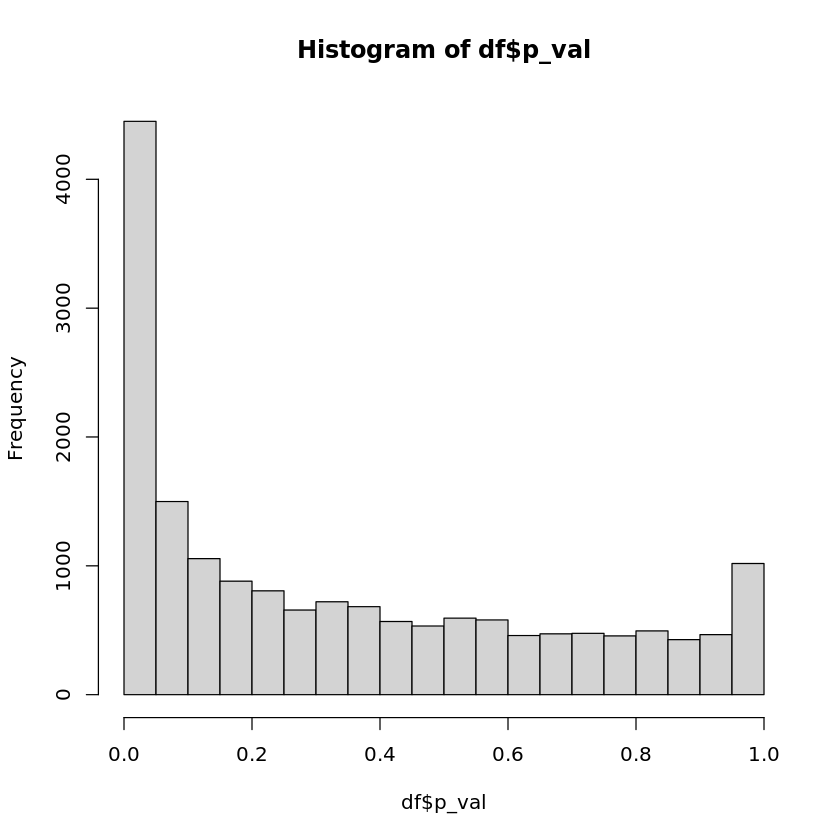

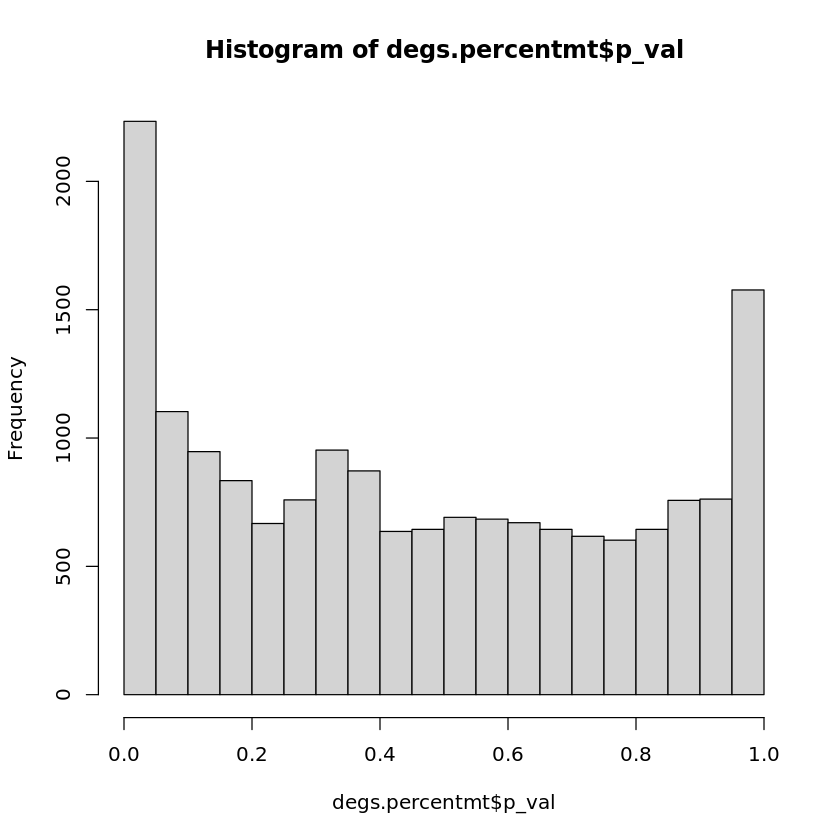

In [29]:
hist(df$p_val)
hist(degs.percentmt$p_val)

In [20]:
sum(df$q_val<0.1)

[1] 2721

In [21]:
dim(df)

[1] 17297     7

In [30]:
degs.percentmt$q_val <- p.adjust(degs.percentmt$p_val)
sum(degs.percentmt$q_val<0.1)

[1] 133